# <CENTER> **Глобальные данные по устойчивой энергетике (2000-2020)**

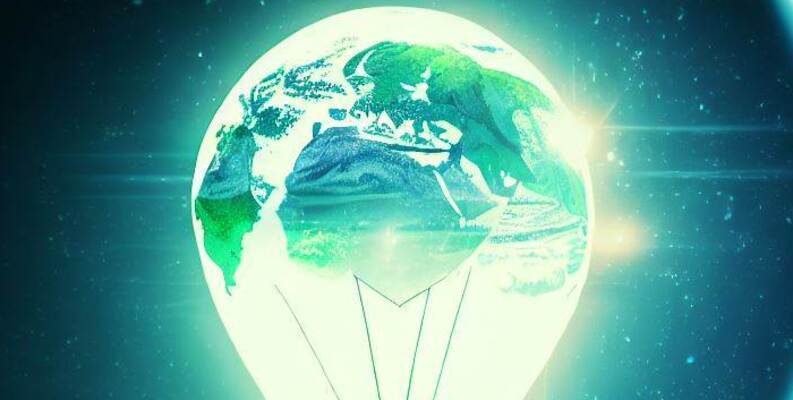

### **Описание:**

Предоставлен набор данных, демонстрирующий показатели устойчивой энергетики и другие полезные факторы по всем странам с 2000 по 2020 год. В нём собрана такая информация, как доступ к электричеству, возобновляемые источники энергии, выбросы углерода, энергоемкость, финансовые потоки и экономический рост.

**Задача:**

Необходимо спрогнозировать будущее потребление энергии.

**Импортируем необходимые библиотеки:**

In [285]:

# Для работы с данными
import numpy as np
import pandas as pd
import category_encoders as ce


# Для построения графиков
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Для построения моделей
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import torch

# LightAutoML
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task         

**Загрузка данных:**

In [287]:
# Загрузка DataFrame
sustainable_energy_data = pd.read_csv('data/global-data-on-sustainable-energy (1).csv', sep = ',')

# Создаём копию
sustainable_energy_df = sustainable_energy_data.copy()

## <CENTER> **`1.` Базовый анализ и знакомство с данными**

#### $1.1$

* Выведем информацию по таблице:

In [222]:
# Выведем размерность данных
print(f'Размерность данных: {sustainable_energy_df.shape}\n')

# Выведем первые пять строк
sustainable_energy_df.head()

Размерность данных: (3649, 21)



,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


### **Основные характеристики:** 

* `Entity`: название страны или региона, по которому предоставляются данные;

* `Year` : год, за который представлены данные, в диапазоне от 2000 до 2020 года;

* `Access to electricity (% of population)`: процент населения, имеющего доступ к электричеству;

* `Access to clean fuels for cooking (% of population)`: процент населения, в основном использующего чистые виды топлива;

* `Renewable-electricity-generating-capacity-per-capita`: установленная мощность возобновляемой энергии на человека;

* `Financial flows to developing countries (US $)`: помощь и содействие со стороны развитых стран для проектов в области чистой энергии;

* `Renewable energy share in total final energy consumption (%)`: процент возобновляемой энергии в конечном потреблении энергии;

* `Electricity from fossil fuels (TWh)`: электроэнергия, выработанная из ископаемого топлива (уголь, нефть, газ) в тераватт-часах;

* `Electricity from nuclear (TWh)`: электроэнергия, выработанная на АЭС, в тераватт-часах

* `Electricity from renewables (TWh)`: электроэнергия, вырабатываемая из возобновляемых источников (гидроэнергия, солнечная энергия, энергия ветра и т. д.) в тераватт-часах;

* `Low-carbon electricity (% electricity)`: процент электроэнергии из источников с низким уровнем выбросов углерода (атомная энергетика и возобновляемые источники энергии);

* `Energy intensity level of primary energy (MJ/$2011 PPP GDP)`: потребление энергии на единицу ВВП по паритету покупательной способности;

* `Value_co2_emissions (metric tons per capita)`: выбросы углекислого газа на человека в метрических тоннах;

* `Renewables (% equivalent primary energy)`: эквивалентная первичная энергия, полученная из возобновляемых источников;

* `GDP growth (annual %)`: годовой темп роста ВВП, рассчитанный на основе постоянной местной валюты;

* `GDP per capita`: валовой внутренний продукт на человека;

* `Density (P/Km2)`: плотность населения в людях на квадратный километр;

* `Land Area (Km2)`: общая площадь земли в квадратных километрах;

* `Latitude`: широта центра страны в десятичных градусах;

* `Longitude`: долгота центра страны в десятичных градусах;



**Целевой признак:**

* `Primary energy consumption per capita (kWh/person)`: потребление энергии на человека в киловатт-часах.

#### $1.2$

* Выведем информацию по признакам:

In [4]:
sustainable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

В данных представлены признаки следующих типов:

   * *object* - 2 признака,
   * *int64* - 1 признак,
   * *float64* - 18 признаков.

#### $1.3$

* Выведем описательные характеристики по признакам:

In [5]:
sustainable_energy_df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


## <CENTER> **`2.` Очистка данных**

На данном этапе выявим и очистим данные от пропусков, дубликатов и выбрасов.

#### $2.1$

* Проверим данные на наличие пропусков:

Суммарное количество пропусков в данных: 6978 

Информация по количествам пропусков: 

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary ene

<Axes: >

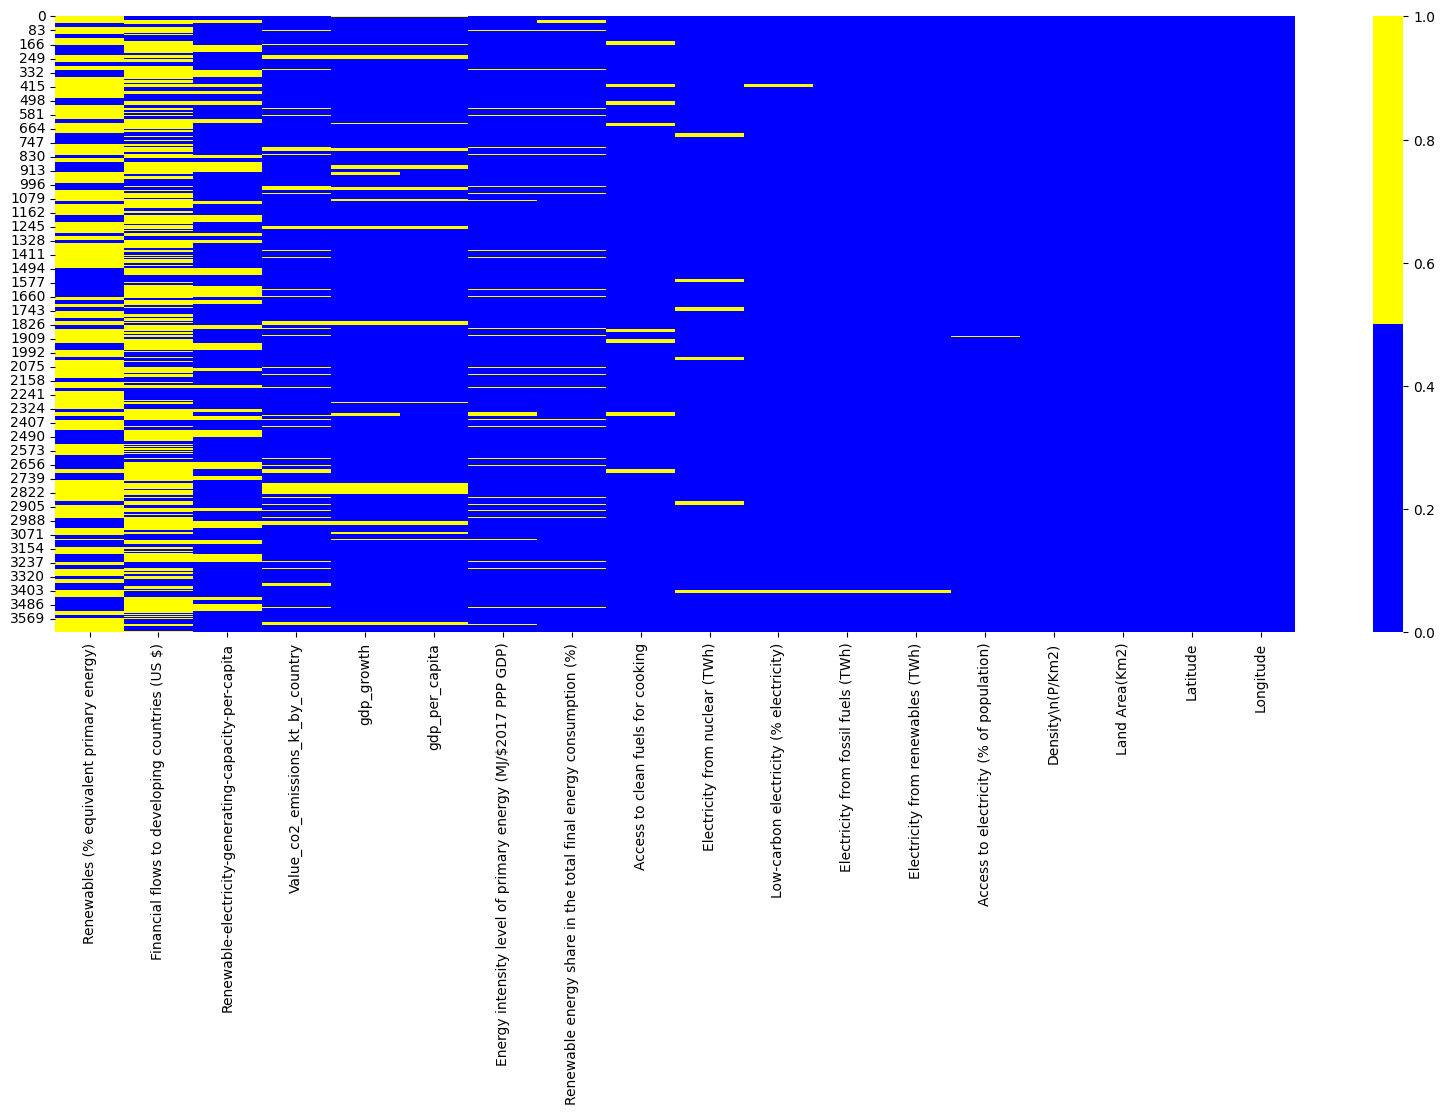

In [288]:
# Выводим суммарное количество пропусков
print('Суммарное количество пропусков в данных: {} \n'.format(sustainable_energy_df.isnull().sum().sum()))

# Выводим признаки с сумрным количеством пропусков
print('Информация по количествам пропусков: \n\n{} \n'.format(sustainable_energy_df.isnull().sum()))



# Построим тепловую карту пропусков
# Создаём функцию отображения пропущенных значений на тепловой карте
def missing_values_heatmap(data):
    
    # Рассчитываем количество пропусков
    cols_null_persent = data.isnull().mean() * 100
    cols_with_null = cols_null_persent[cols_null_persent > 0].sort_values(ascending = False)
    print(cols_with_null)
    
    # Задаём параметры графика
    colors = ['blue', 'yellow']
    fig = plt.figure(figsize = (20, 8))
    cols = cols_with_null.index
    
    # Строим тепловую карту
    ax = sns.heatmap(
        data = data[cols].isnull(),
        cmap = sns.color_palette(colors)
    )
    
    return ax


# Применяем полученную функцию к нашему датасету
missing_values_heatmap(sustainable_energy_df)

**Вывод:**

Из полученной информации видно, что пропуски имеют следующие признаки:

  * *Renewables (% equivalent primary energy)*___________________________58.563 %
  * *Financial flows to developing countries (US $)*_____________________57.248 %
  * *Renewable-electricity-generating-capacity-per-capita*_______________25.513 %
  * *Value_co2_emissions_kt_by_country*__________________________________11.729 %
  * *gdp_growth*__________________________________________________________8.687 %
  * *gdp_per_capita*______________________________________________________7.728 %
  * *Energy intensity level of primary energy (MJ/$2017 PPP GDP)*_________5.672 %
  * *Renewable energy share in the total final energy consumption (%)*____5.316 %
  * *Access to clean fuels for cooking*___________________________________4.631 %
  * *Electricity from nuclear (TWh)*______________________________________3.453 %
  * *Low-carbon electricity (% electricity)*______________________________1.151 %
  * *Electricity from fossil fuels (TWh)*_________________________________0.575 %
  * *Electricity from renewables (TWh)*___________________________________0.575 %
  * *Access to electricity (% of population)*_____________________________0.274 %
  * *Density\n(P/Km2)*____________________________________________________0.027 %
  * *Land Area(Km2)*______________________________________________________0.027 %
  * *Latitude*____________________________________________________________0.027 %
  * *Longitude*___________________________________________________________0.027 %

* Обработаем пропущенные значения следующим образом:

    * Признаки `Renewables (% equivalent primary energy)` и `Financial flows to developing countries (US $)` удалим, так как количество пропущенных значений в них превышает $50%$;

    * Пропуски в признаках `Renewable-electricity-generating-capacity-per-capita` и `Value_co2_emissions_kt_by_country` заполним **средним** значением;

    * Пропуски в признаках `gdp_growth`, `gdp_per_capita`, `Energy intensity level of primary energy (MJ/$2017 PPP GDP)` и `Renewable energy share in the total final energy consumption (%)` заполним **медианным** значением;

    * В остальных случаях удалим строки.

In [289]:
# Удаляем признаки из данных
sustainable_energy_df = sustainable_energy_df.drop(columns = [
    'Renewables (% equivalent primary energy)',
    'Financial flows to developing countries (US $)'
])



# Заполняем пропущенные значения средним
columns_to_fill_mean = [
    'Renewable-electricity-generating-capacity-per-capita',
    'Value_co2_emissions_kt_by_country'
]
sustainable_energy_df[columns_to_fill_mean] = sustainable_energy_df[columns_to_fill_mean].fillna(sustainable_energy_df[columns_to_fill_mean].mean())



# Заполняем пропущенные значения медианой
columns_to_fill_median = [
    'gdp_growth',
    'gdp_per_capita',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Renewable energy share in the total final energy consumption (%)'
]
sustainable_energy_df[columns_to_fill_median] = sustainable_energy_df[columns_to_fill_median].fillna(sustainable_energy_df[columns_to_fill_median].median())



# Удаляем строки с пропущенными значениями
sustainable_energy_df = sustainable_energy_df.dropna(subset = [
    'Access to clean fuels for cooking',
    'Electricity from nuclear (TWh)',
    'Low-carbon electricity (% electricity)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Access to electricity (% of population)',
    'Density\\n(P/Km2)',
    'Land Area(Km2)',
    'Latitude',
    'Longitude'
])

Выведем количество пропусков:

In [290]:
# Выводим признаки с сумрным количеством пропусков
print('Информация по количествам пропусков: \n\n{} \n\n'.format(sustainable_energy_df.isnull().sum()))


# Выводим размерность таблицы
print('Размерность таблицы после удаления пропусков: {}'.format(sustainable_energy_df.shape))

Информация по количествам пропусков: 

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                         

#### $2.2$

* Проверяем данные на наличие дубликатов:

In [291]:
# Создаём список признаков
dupl_columns = list(sustainable_energy_df.columns)


# Создаём маску дубликатов с помощью метода duplicated() и произведём фильтрацию
mask = sustainable_energy_df.duplicated(subset = dupl_columns)
train_duplicates = sustainable_energy_df[mask]
print(f'Число найденных дубликатов: {train_duplicates.shape[0]}')

Число найденных дубликатов: 0


#### $2.3$

* Проверяем данные на наличие выбрасов.

Создадим список признаков с возможными выбросами:

In [292]:
features_list = [
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'gdp_growth',
    'gdp_per_capita',
    'Land Area(Km2)'
]

Создадим функцию для поиска выбросов:

In [293]:
# Функция для поиска выбросов через IQR
def detect_outliers_iqr(data, features):
    
    # Создаём словарь, ключами которого будут индексы признаков,
    # а значениями - их количество
    outliers_dict = {}
    
    
    # Пройдёмся циклом for по признакам
    for feature in features:
        
        Q1 = data[feature].quantile(0.25)         # первый квартиль
        Q3 = data[feature].quantile(0.75)         # третий квартиль
        IQR = Q3 - Q1                             # межквартильный размах
        
        # Границы (нижняя и верхняя) для определения выбросов
        lower_bound = Q1 - 1.5 * IQR    
        upper_bound = Q3 + 1.5 * IQR   
        
        # Поиск выбросов
        outliers_dict[feature] = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]  
        
    return outliers_dict

Организуем поиск выбросов:

In [294]:
# Создаём переменную, в котором будем хранить признаки с количеством выбросов
outliers = detect_outliers_iqr(
    data = sustainable_energy_df,
    features = features_list
)


# Вывод выбросов
for feature, values in outliers.items():
    print(f"Количество выбросов в признаке {feature}:")
    print(len(values))
    print()

Количество выбросов в признаке Renewable-electricity-generating-capacity-per-capita:
246

Количество выбросов в признаке Renewable energy share in the total final energy consumption (%):
0

Количество выбросов в признаке Electricity from fossil fuels (TWh):
462

Количество выбросов в признаке Electricity from nuclear (TWh):
557

Количество выбросов в признаке Electricity from renewables (TWh):
491

Количество выбросов в признаке Low-carbon electricity (% electricity):
0

Количество выбросов в признаке Primary energy consumption per capita (kWh/person):
255

Количество выбросов в признаке Energy intensity level of primary energy (MJ/$2017 PPP GDP):
289

Количество выбросов в признаке Value_co2_emissions_kt_by_country:
296

Количество выбросов в признаке gdp_growth:
258

Количество выбросов в признаке gdp_per_capita:
471

Количество выбросов в признаке Land Area(Km2):
357



Из полученных расчётов были выявлены выбросы в следующих признаках:

* *Renewable-electricity-generating-capacity-per-capita*,
* *Electricity from fossil fuels (TWh)*,
* *Electricity from nuclear (TWh)*,
* *Electricity from nuclear (TWh)*,
* *Primary energy consumption per capita (kWh/person)*,
* *Energy intensity level of primary energy (MJ/$2017 PPP GDP)*,
* *Value_co2_emissions_kt_by_country*,
* *gdp_growth*,
* *gdp_per_capita*,
* *Land Area(Km2)*

Построим гистограмму и коробчатую диаграмму для признака `Renewable-electricity-generating-capacity-per-capita`:

Text(0.5, 1.0, 'Renewable electricity Boxplot')

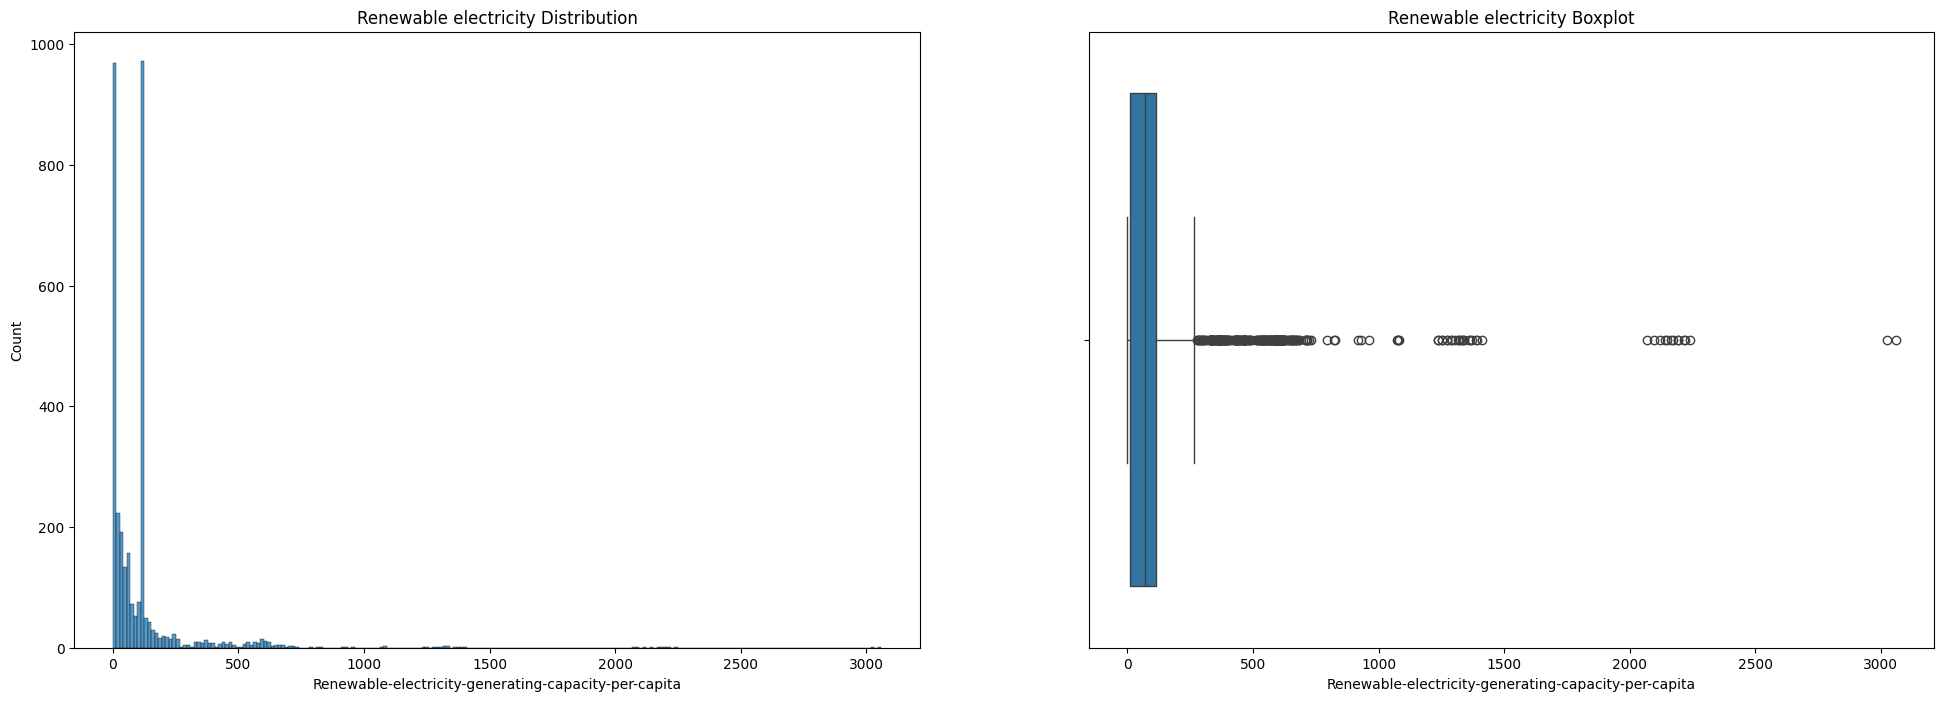

In [295]:
# Задаём параметры 
fig, axes = plt.subplots(
    nrows = 1, 
    ncols = 2, 
    figsize = (24, 8)
)



# Строим гистограмму
histplot = sns.histplot(
    data = sustainable_energy_df,
    x = 'Renewable-electricity-generating-capacity-per-capita',
    ax = axes[0]
);

# Название гистограммы
histplot.set_title('Renewable electricity Distribution');

# Строим коробчатую диаграмму
boxplot = sns.boxplot(
    data = sustainable_energy_df,
    x = 'Renewable-electricity-generating-capacity-per-capita',
    ax = axes[1]
);

# Название коробчатой диаграммы
boxplot.set_title('Renewable electricity Boxplot')

Удалим найденные выбросы:

In [296]:
# Выделяем признак 'Renewable-electricity-generating-capacity-per-capita'
x = sustainable_energy_df['Renewable-electricity-generating-capacity-per-capita']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 270
Нижняя граница поиска: -148


In [297]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 246
Результирующее число записей: 3099


Построим график с очищенными данными:

Text(0.5, 1.0, 'Cleaned Renewable electricity Boxplot')

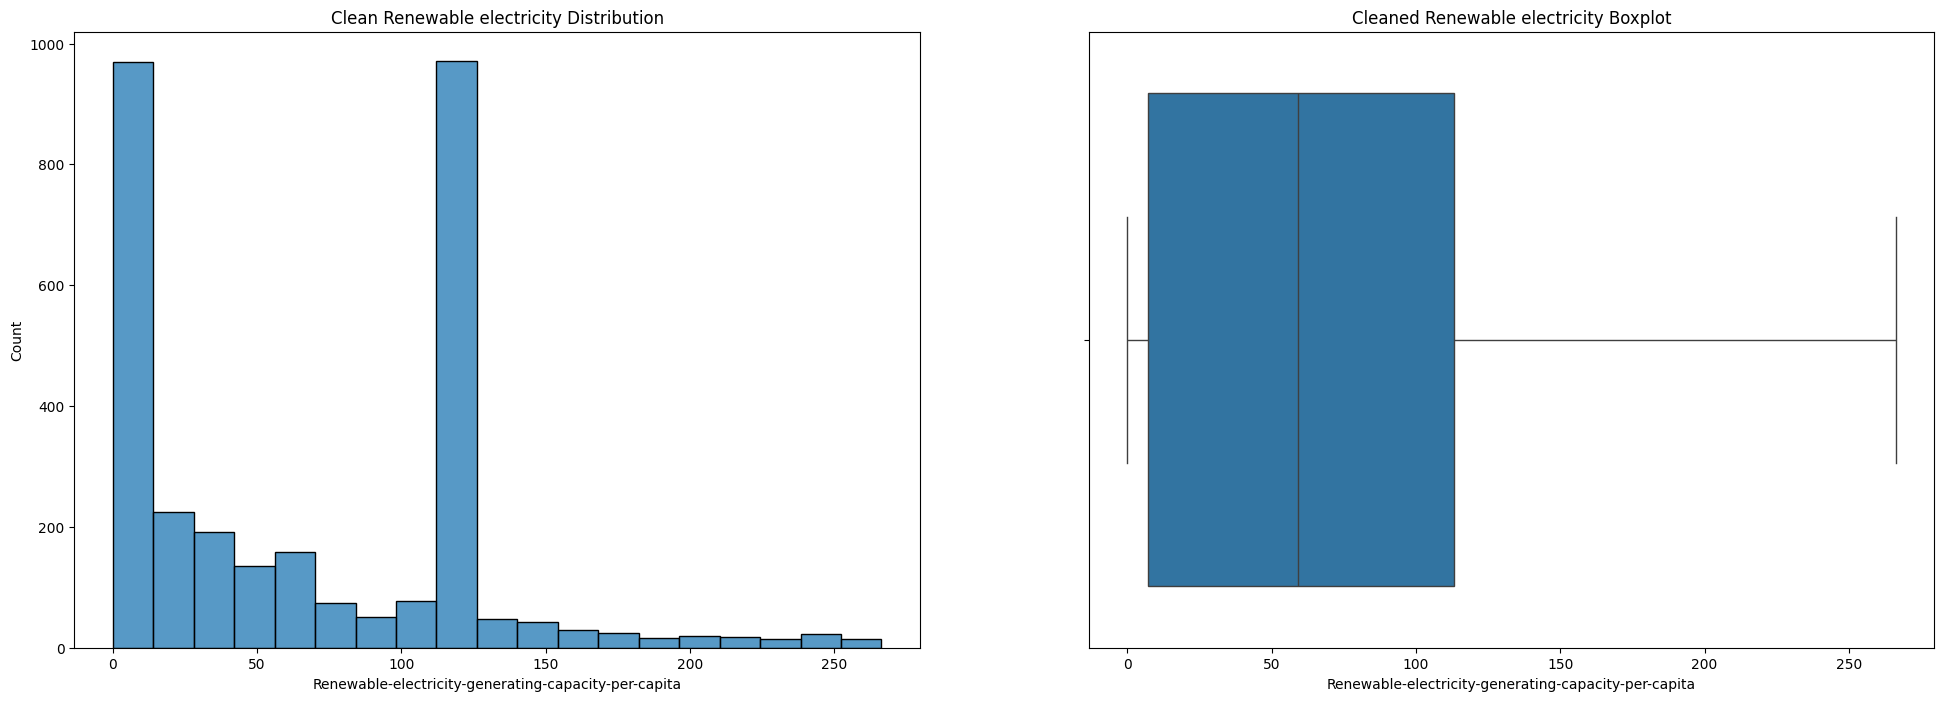

In [298]:
# Задаём параметры графика
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 8))


# Строим гистограмму
histplot = sns.histplot(
    data = sustainable_energy_df,
    x = 'Renewable-electricity-generating-capacity-per-capita',
    ax = axes[0]
);

# Название графика
histplot.set_title('Clean Renewable electricity Distribution');



# Строим коробчатую диаграмму
boxplot = sns.boxplot(
    data = sustainable_energy_df,
    x = 'Renewable-electricity-generating-capacity-per-capita',
    ax = axes[1]
);

# Название графика
boxplot.set_title('Cleaned Renewable electricity Boxplot')

Построим гистограмму и коробчатую диаграмму для признака `Electricity from fossil fuels (TWh)`:

Text(0.5, 1.0, 'Electricity from fossil fuels Boxplot')

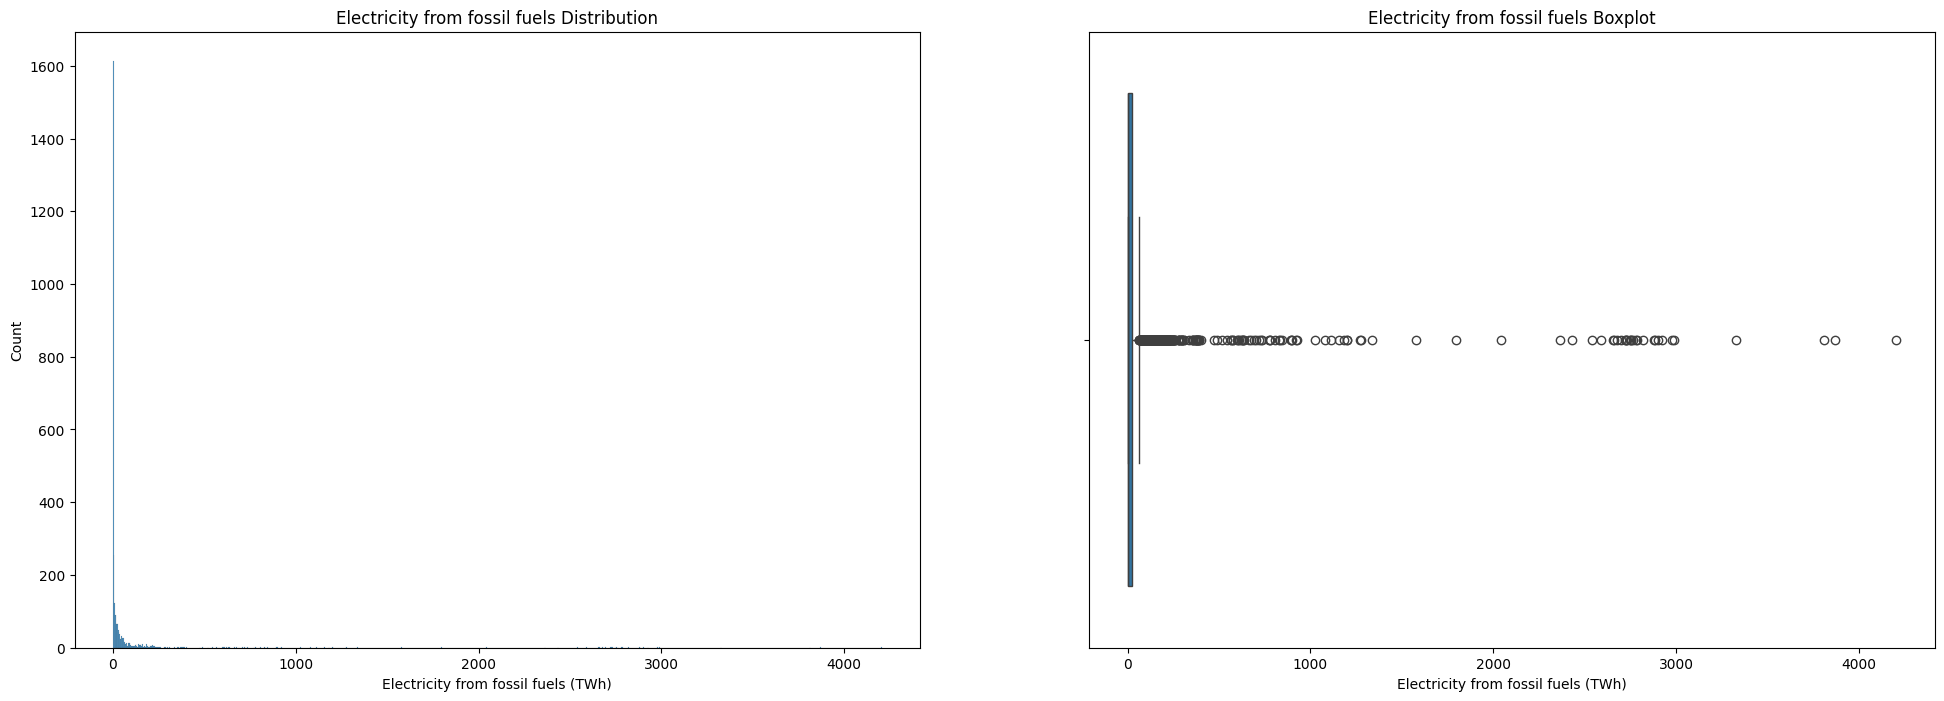

In [299]:
# Задаём параметры 
fig, axes = plt.subplots(
    nrows = 1, 
    ncols = 2, 
    figsize = (24, 8)
)



# Строим гистограмму
histplot = sns.histplot(
    data = sustainable_energy_df,
    x = 'Electricity from fossil fuels (TWh)',
    ax = axes[0]
);

# Название гистограммы
histplot.set_title('Electricity from fossil fuels Distribution');

# Строим коробчатую диаграмму
boxplot = sns.boxplot(
    data = sustainable_energy_df,
    x = 'Electricity from fossil fuels (TWh)',
    ax = axes[1]
);

# Название коробчатой диаграммы
boxplot.set_title('Electricity from fossil fuels Boxplot')

Удалим найденные выбросы:

In [300]:
# Выделяем признак 'Electricity from fossil fuels (TWh)'
x = sustainable_energy_df['Electricity from fossil fuels (TWh)']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 65
Нижняя граница поиска: -39


In [301]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 421
Результирующее число записей: 2678


Удалим выбросы из признака `Electricity from nuclear (TWh)`:

In [302]:
# Выделяем признак 'Electricity from nuclear (TWh)'
x = sustainable_energy_df['Electricity from nuclear (TWh)']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 0
Нижняя граница поиска: 0


In [303]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 243
Результирующее число записей: 2435


Удалим выбросы из признака `Primary energy consumption per capita (kWh/person)`:

In [304]:
# Выделяем признак 'Primary energy consumption per capita (kWh/person)'
x = sustainable_energy_df['Primary energy consumption per capita (kWh/person)']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 52903
Нижняя граница поиска: -28696


In [305]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 242
Результирующее число записей: 2193


Удалим выбросы из признака `Energy intensity level of primary energy (MJ/$2017 PPP GDP)`:

In [306]:
# Выделяем признак 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
x = sustainable_energy_df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 10
Нижняя граница поиска: -1


In [307]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 196
Результирующее число записей: 1997


Удалим выбросы из признака `Value_co2_emissions_kt_by_country`:

In [308]:
# Выделяем признак 'Value_co2_emissions_kt_by_country'
x = sustainable_energy_df['Value_co2_emissions_kt_by_country']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 99285
Нижняя граница поиска: -57315


In [309]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 281
Результирующее число записей: 1716


Удалим выбросы из признака `gdp_growth`:

In [310]:
# Выделяем признак 'gdp_growth'
x = sustainable_energy_df['gdp_growth']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 12
Нижняя граница поиска: -4


In [311]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 108
Результирующее число записей: 1608


Удалим выбросы из признака `gdp_per_capita`:

In [312]:
# Выделяем признак 'gdp_per_capita'
x = sustainable_energy_df['gdp_per_capita']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 13030
Нижняя граница поиска: -6206


In [313]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 185
Результирующее число записей: 1423


Удалим выбросы из признака `Land Area(Km2)`:

In [314]:
# Выделяем признак 'gdp_per_capita'
x = sustainable_energy_df['gdp_per_capita']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 10158
Нижняя граница поиска: -4721


In [315]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 44
Результирующее число записей: 1379


## <CENTER> **`3.` Разведывательный анализ данных**

В данной части проекта мы:

   * изучаем сгенерированный набор данных;

   * дополним наш анализ визуализациями, иллюстрирующими исследование.


Основным показателем качества решения задачи будет метрика **RMSLE (Root Mean Squared Log Error)**, которая рассчитывается на основе целевой переменной в логарифмическом масштабе.

В этом случае целесообразно сразу взять логарифм потребления энергии и считать логарифм целевым знаком при анализе:

In [316]:
# Возьмём логарифм от целевого признака, при этом создадим новый признак
sustainable_energy_df['Primary energy consumption per capita (kWh/person) log'] = np.log(sustainable_energy_df['Primary energy consumption per capita (kWh/person)'] + 1)

#### $3.1$

* Исследем, как уровень доступа к электричеству соотносится с уровнем дохода на душу населения:

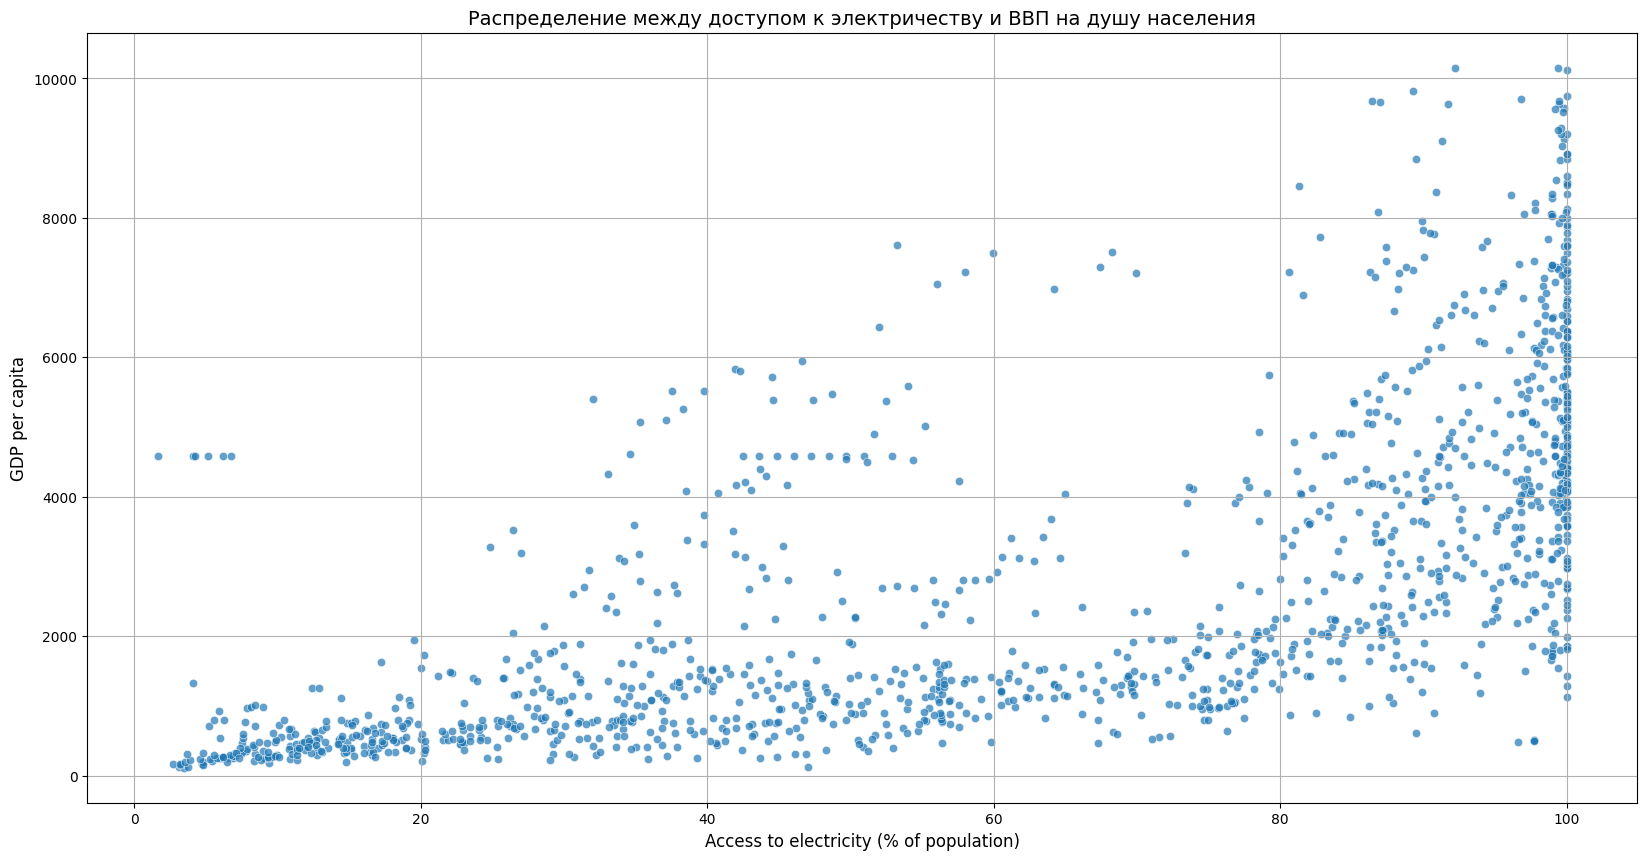

In [317]:
# Задаём параметры графика
plt.figure(figsize = (20, 10))


# Строим диаграмму рассеяния
sns.scatterplot(
    data = sustainable_energy_df,
    x = 'Access to electricity (% of population)',
    y = 'gdp_per_capita',
    alpha = 0.7
)

# Задаём название графика и дополнительные параметры
plt.title('Распределение между доступом к электричеству и ВВП на душу населения', fontsize = 14)
plt.xlabel('Access to electricity (% of population)', fontsize = 12)
plt.ylabel('GDP per capita', fontsize = 12)
plt.grid(True)
plt.show()

**Вывод:**

* **Высокая концентрация точек возле 100% доступа к электричеству**: Это указывает на то, что в странах с почти полным доступом к электричеству ВВП на душу населения варьируется, но в большинстве случаев находится на высоком уровне,

* **Взаимосвязь между доступом к электричеству и ВВП**: Наблюдается положительная тенденция. В странах с низким уровнем доступа к электричеству ВВП на душу населения, как правило, также невысок,

* **Исключения**: Есть отдельные точки, где при небольшом уровне доступа к электричеству ВВП на душу населения относительно высок, что может быть связано с экономическими особенностями этих стран.

#### $3.2$

* Посмотрим, существует ли связь между доступом к чистым видам топлива и электричеству:

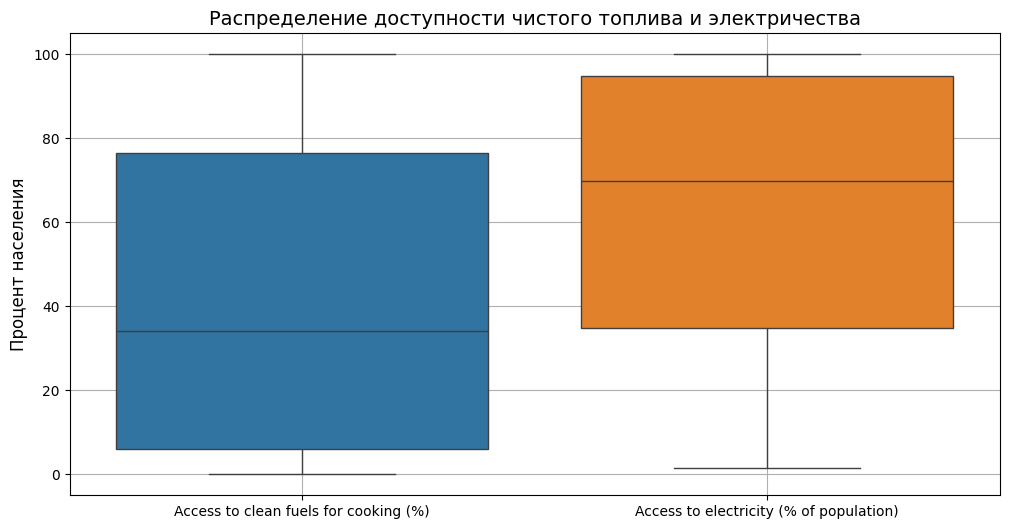

In [318]:
# Выделяем необходимые признаки
columns_to_distrib = sustainable_energy_df.loc[:, [
    'Access to clean fuels for cooking',
    'Access to electricity (% of population)'
]]


# Задаём параметры графика
plt.figure(figsize = (12, 6))


# Создаем отдельные ящики для каждого признака
sns.boxplot(data = columns_to_distrib)
plt.title("Распределение доступности чистого топлива и электричества", fontsize = 14)
plt.xticks([0, 1], ['Access to clean fuels for cooking (%)', 'Access to electricity (% of population)'])
plt.ylabel("Процент населения", fontsize = 12)
plt.grid(True)
plt.show()

**Вывод:**

1. **Доступность топлива**:
    * Средний уровень доступности топлива находится примерно на уровне 50%,
    * Значительная часть населения имеет низкий доступ к чистому топливу (нижний квартиль близок к 20%).

2. **Доступность электричества**:
    * Средний уровень доступа к электричеству находится на уровне 80-90%,
    * Большинство населения имеет высокий доступ к электричеству.

#### $3.3$

Посмотрим, как производство электроэнергии из ископаемых источников связано с выбросами углекислого газа на душу населения:

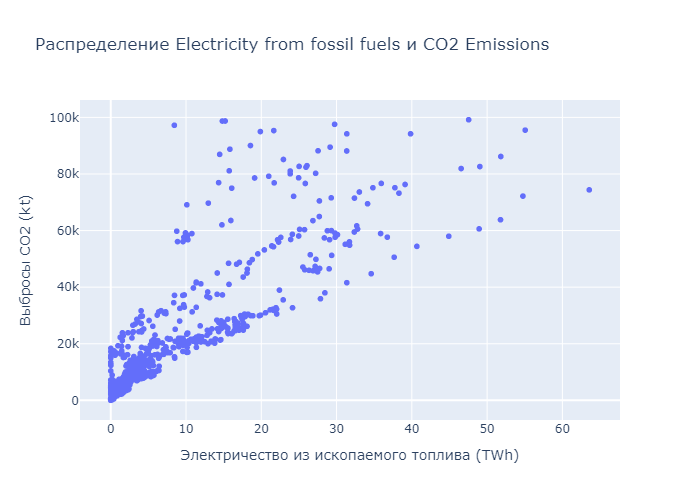

In [321]:
# Построение графика
fig = px.scatter(
    data_frame = sustainable_energy_df,
    x = 'Electricity from fossil fuels (TWh)',
    y = 'Value_co2_emissions_kt_by_country',
    title = 'Распределение Electricity from fossil fuels и CO2 Emissions',
    
    labels = {
        'Electricity from fossil fuels (TWh)': 'Электричество из ископаемого топлива (TWh)',
        'Value_co2_emissions_kt_by_country': 'Выбросы CO2 (kt)'
    },
    
    template = 'plotly', 
    size_max = 10
)

# Вывод графика
fig.show('png')

**Выводы:**

1. На графике видна тенденция роста выбросов CO₂ с увеличением объёма электроэнергии, производимой из ископаемого топлива. Это указывает на прямую зависимость между этими показателями,


2. Данные разделены на два основных кластера:

    * Низкое производство электроэнергии (менее 10 TWh) связано с высокими выбросами CO₂ (около 950–1000 kt),
    * Более высокое производство электроэнергии (30–45 TWh) связано с более низкими выбросами CO₂ (около 700–750 kt).


3. В группе с более высоким производством электроэнергии выбросы CO₂ ниже, что может быть связано с использованием более чистых технологий, эффективных методов производства или различиями в типах ископаемого топлива.

#### $3.4$

Проверим связь между уровнем дохода и доступом к чистым видам топлива:

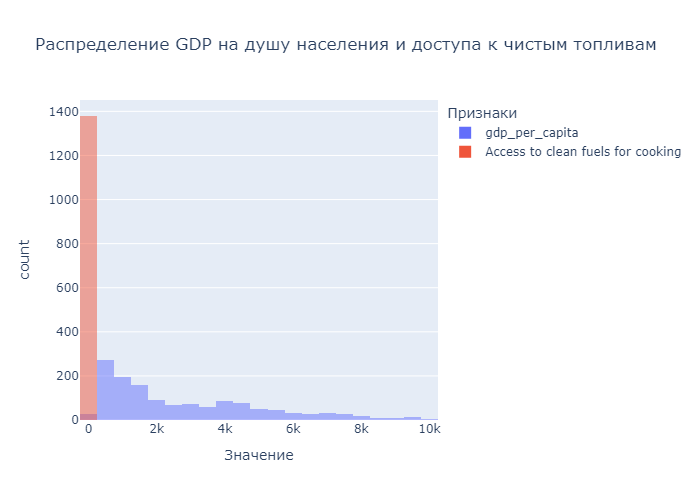

In [322]:
# Преобразуем данные в "длинный формат" для удобной работы с histogram
data_long = sustainable_energy_df.melt(
    value_vars = ['gdp_per_capita', 'Access to clean fuels for cooking'],
    var_name = 'Feature',
    value_name = 'Value')



# Построение гистограммы
fig = px.histogram(
    data_long,
    x = 'Value',
    color = 'Feature',
    barmode = 'overlay',  
    title = 'Распределение GDP на душу населения и доступа к чистым топливам',
    labels = {'Value': 'Значение', 'Feature': 'Признаки'},
    nbins = 30  
)

# Отображение графика
fig.show('png')

**Вывод:**

В странах с низким ВВП на душу населения доступ к чистым топливам ограничен, так как значения дохода ниже 20 тыс. USD составляют основную массу населения. Так же большая часть населения, которая обладает доступом к чистым видам топлива, сосредоточена в странах с невысоким ВВП на душу населения.

## <CENTER> **`4.` Feature engineering (Создание новых признаков)**

На данном этапе преобразуем некоторые из признаков.

#### $4.1$ 

Преобразуем признак `Entity`.

Составим словарб, в котором ключами будут названия континентов, а значениями - страны:

In [253]:
# Создадим словарь для группировки по континентам
continent_dict = {   
                  
    "Asia": ["Afghanistan", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", 
             "Brunei", "Cambodia", "China", "Cyprus", "Georgia", 
             "India", "Indonesia", "Iran", "Iraq", "Israel", 
             "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", 
             "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", 
             "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", 
             "Palestine", "Philippines", "Qatar", "Saudi Arabia", 
             "Singapore", "South Korea", "Sri Lanka", "Syria", 
             "Tajikistan", "Thailand", "Timor-Leste", "Turkmenistan", 
             "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"],
    
    "Europe": ["Albania", "Andorra", "Austria", "Belarus", "Belgium", 
               "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
               "Czechia", "Denmark", "Estonia", "Finland", "France", 
               "Germany", "Greece", "Hungary", "Iceland", "Ireland", 
               "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", 
               "Moldova", "Monaco", "Montenegro", "Netherlands", 
               "North Macedonia", "Norway", "Poland", "Portugal", 
               "Romania", "San Marino", "Serbia", "Slovakia", 
               "Slovenia", "Spain", "Sweden", "Switzerland", 
               "United Kingdom"],
    
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", 
               "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", 
               "Chad", "Comoros", "Congo", "Djibouti", "Egypt", 
               "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", 
               "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", 
               "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", 
               "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", 
               "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", 
               "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", 
               "Sierra Leone", "Somalia", "South Africa", "South Sudan", 
               "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", 
               "Zambia", "Zimbabwe"],
    
    "North America": ["Antigua and Barbuda", "Bahamas", "Barbados", 
                      "Belize", "Canada", "Costa Rica", "Cuba", 
                      "Dominica", "Dominican Republic", "El Salvador", 
                      "Guatemala", "Haiti", "Honduras", "Jamaica", 
                      "Mexico", "Nicaragua", "Panama", "United States"],
    
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", 
                      "Colombia", "Ecuador", "Guyana", "Paraguay", 
                      "Peru", "Suriname", "Uruguay", "Venezuela"],
    
    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", 
                "Micronesia", "Nauru", "New Zealand", "Palau", 
                "Papua New Guinea", "Samoa", "Solomon Islands", 
                "Tonga", "Tuvalu", "Vanuatu"]
    
}

Преобразование:

In [254]:
# Создание функции для определения континента
def get_continent(country):
    for continent, countries in continent_dict.items():
        if country in countries:
            return continent
    return 'Unknown' 


# Примененяем созданную функцию к столбцу 'Entity'
sustainable_energy_df['Entity'] = sustainable_energy_df['Entity'].apply(get_continent)

# Вывод результата
sustainable_energy_df['Entity']

0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
3628    Africa
3629    Africa
3644    Africa
3645    Africa
3646    Africa
Name: Entity, Length: 1379, dtype: object

Теперь применим `OneHotEncoder` для создания нескольких бинарных признаков:

In [255]:
# Создаём экземпляр класса OneHotEncoder()
oh_encoder = OneHotEncoder(drop = 'first')

# Создаём список признаков для обработки 
columns_to_change = ['Entity']

# Кодируем признаки
data_onehot = oh_encoder.fit_transform(sustainable_energy_df[columns_to_change]).toarray()

# Выделим названия закодированных признаков
oh_columns_names = oh_encoder.get_feature_names_out()

# Создаём новый датафрейм с закодированными признаками
data_onehot = pd.DataFrame(
    data = data_onehot,
    columns = oh_columns_names
)

# Выведем количество новых признаков
print('Количество полученных признаков: {}'.format(data_onehot.shape[1]))

Количество полученных признаков: 6


Добавим закодированные признаки в основную таблицу:

In [256]:
# Объединяем оба датафрейма
sustainable_energy_df = pd.concat(
    [sustainable_energy_df.reset_index(drop = True).drop(columns_to_change, axis = 1), data_onehot],
    axis = 1
)


# Выведем первые пять строк 
sustainable_energy_df.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Land Area(Km2),Latitude,Longitude,Primary energy consumption per capita (kWh/person) log,Entity_Asia,Entity_Europe,Entity_North America,Entity_Oceania,Entity_South America,Entity_Unknown
0,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,...,652230.0,33.93911,67.709953,5.715694,1.0,0.0,0.0,0.0,0.0,0.0
1,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,...,652230.0,33.93911,67.709953,5.471816,1.0,0.0,0.0,0.0,0.0,0.0
2,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,...,652230.0,33.93911,67.709953,5.355936,1.0,0.0,0.0,0.0,0.0,0.0
3,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,...,652230.0,33.93911,67.709953,5.442280,1.0,0.0,0.0,0.0,0.0,0.0
4,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,...,652230.0,33.93911,67.709953,5.324137,1.0,0.0,0.0,0.0,0.0,0.0


#### $4.2$

Преобразуем признак `Year`.

Для этого воспользуемся методом `BinaryEncoder`:

In [257]:
# Создаём экземпляр класса BinaryEncoder()
bin_encoder = ce.BinaryEncoder(cols = ['Year'])

# Кодируем признак с помощью класса BinaryEncoder()
data_binary = bin_encoder.fit_transform(sustainable_energy_df['Year'])

# Объединяем датасеты
sustainable_energy_df = pd.concat([sustainable_energy_df, data_binary], axis = 1)

# Выведем количество новых признаков
print('Количество полученных признаков: {}'.format(data_binary.shape[1]))

Количество полученных признаков: 5


#### $4.3$

Удалим признаки типа `object`:

In [258]:
# Создаём список признаков типа 'object'
object_columns = [features for features in sustainable_energy_df.columns if sustainable_energy_df[features].dtype == 'object']
sustainable_energy_df.drop(object_columns, axis = 1, inplace = True)


# Выведем типипзацию признаков
sustainable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 29 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              1379 non-null   int64  
 1   Access to electricity (% of population)                           1379 non-null   float64
 2   Access to clean fuels for cooking                                 1379 non-null   float64
 3   Renewable-electricity-generating-capacity-per-capita              1379 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  1379 non-null   float64
 5   Electricity from fossil fuels (TWh)                               1379 non-null   float64
 6   Electricity from nuclear (TWh)                                    1379 non-null   float64
 7   Electricity from renewables (TWh)

## <CENTER> **`5.` Отбор признаков**

#### $5.1$

Проводим корреляционный анализ. Построим тепловую карту корреляций признаков:

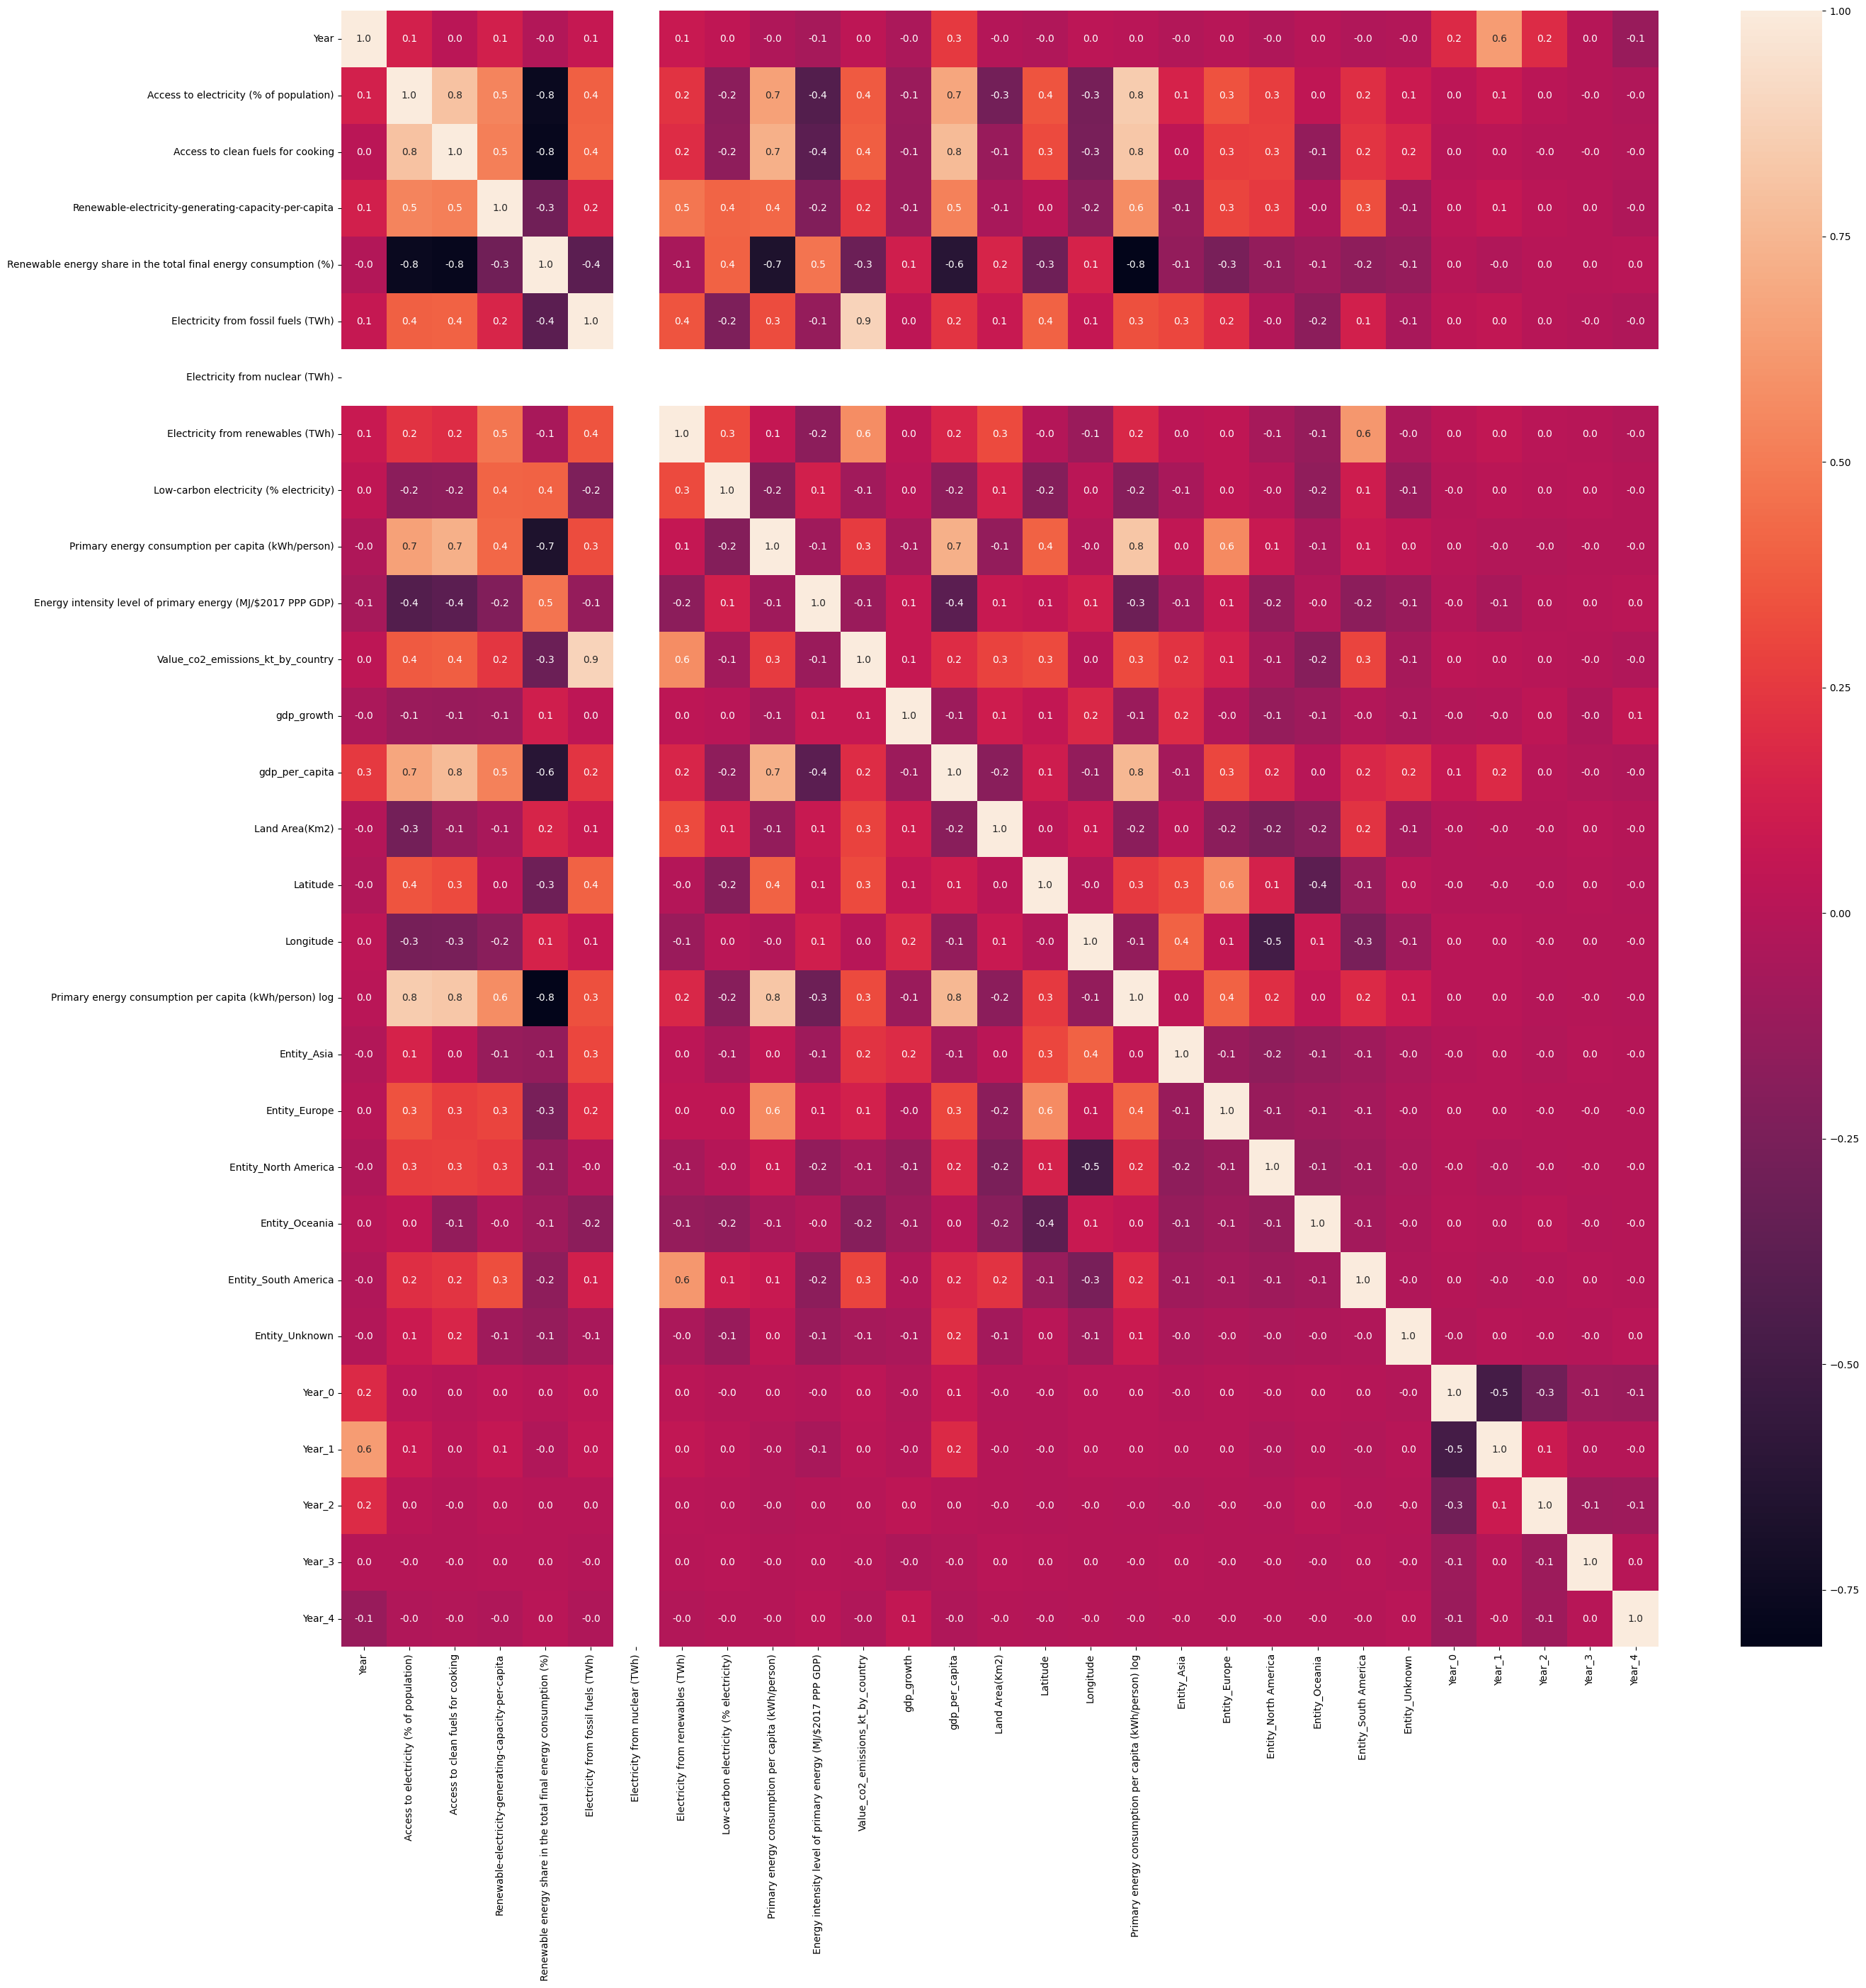

In [259]:
# Задаём параметры графика
plt.rcParams['figure.figsize'] = (30, 30)


# Строим график
sns.heatmap(
    data = sustainable_energy_df.corr(),
    annot = True,
    fmt = '.1f'
);

**Вывод:**

Исходя из построенной тепловой карты максимальное значение корреляции доходит до 1.0. Избавимся от мультиколлинеарности.

Из данных удалим признак `Value_co2_emissions_kt_by_country`:

In [260]:
# Удаление признака
sustainable_energy_df = sustainable_energy_df.drop('Value_co2_emissions_kt_by_country', axis = 1)

# Выодим информацию
sustainable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 28 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              1379 non-null   int64  
 1   Access to electricity (% of population)                           1379 non-null   float64
 2   Access to clean fuels for cooking                                 1379 non-null   float64
 3   Renewable-electricity-generating-capacity-per-capita              1379 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  1379 non-null   float64
 5   Electricity from fossil fuels (TWh)                               1379 non-null   float64
 6   Electricity from nuclear (TWh)                                    1379 non-null   float64
 7   Electricity from renewables (TWh)

#### $5.2$

Теперь, когда категориальные признаки предварительно обработаны, давайте сформируем матрицу наблюдения `X`, вектор целевой переменной `y` и логарифмической целевой переменной `y_log`:

In [261]:
# Матрица наблюдений X
X = sustainable_energy_df.drop(columns = ['Primary energy consumption per capita (kWh/person)', 'Primary energy consumption per capita (kWh/person) log'], axis = 1)

# Вектор правильных ответов y
y = sustainable_energy_df['Primary energy consumption per capita (kWh/person)']

# Вектор правильных ответов y_log
y_log = sustainable_energy_df['Primary energy consumption per capita (kWh/person) log']

Далее нам необходимо определить тип валидации — схему, по которой мы будем оценивать качество построенных моделей.

Разделим выборку на обучающую и проверочную в соотношении 80/20:

In [262]:
# С помощью библиотеки sklearn разделим данные на тренировочную и валидационную
X_train, X_valid, y_train_log, y_valid_log = train_test_split(X, y_log, test_size = 0.2, random_state = 42)

Выведем размерности:

In [263]:
print('Размер тренировочной выборки: {}'.format(X_train.shape))
print('Размер валидационной выборки: {}'.format(X_valid.shape))

Размер тренировочной выборки: (1103, 26)
Размер валидационной выборки: (276, 26)


#### $5.3$

Используем алгоритм `SelectKBest` чтобы выделить 25 наиболее важных признаков для предсказания:

In [264]:
# Создаём объект класса SelectKBest()
selector = feature_selection.SelectKBest(
    score_func = feature_selection.f_regression,
    k = 25
)

# Применяем полученный объект к тренировочной выборке
selector.fit(X_train, y_train_log)

# Оставляем только выбранные признаки
important_features = selector.get_feature_names_out()
X_train = X_train[important_features]
X_valid = X_valid[important_features]

# Выведем выбранные признаки
print('При помощи объекта SelectKBest были выбраны следующие признаки:\n\n {}'.format(important_features))

При помощи объекта SelectKBest были выбраны следующие признаки:

 ['Year' 'Access to electricity (% of population)'
 'Access to clean fuels for cooking'
 'Renewable-electricity-generating-capacity-per-capita'
 'Renewable energy share in the total final energy consumption (%)'
 'Electricity from fossil fuels (TWh)' 'Electricity from renewables (TWh)'
 'Low-carbon electricity (% electricity)'
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
 'gdp_growth' 'gdp_per_capita' 'Land Area(Km2)' 'Latitude' 'Longitude'
 'Entity_Asia' 'Entity_Europe' 'Entity_North America' 'Entity_Oceania'
 'Entity_South America' 'Entity_Unknown' 'Year_0' 'Year_1' 'Year_2'
 'Year_3' 'Year_4']


#### $5.4$

Произведём нормализацию признаков при помощи алгоритма `MinMaxScaler`, но для начала построим график распределения:

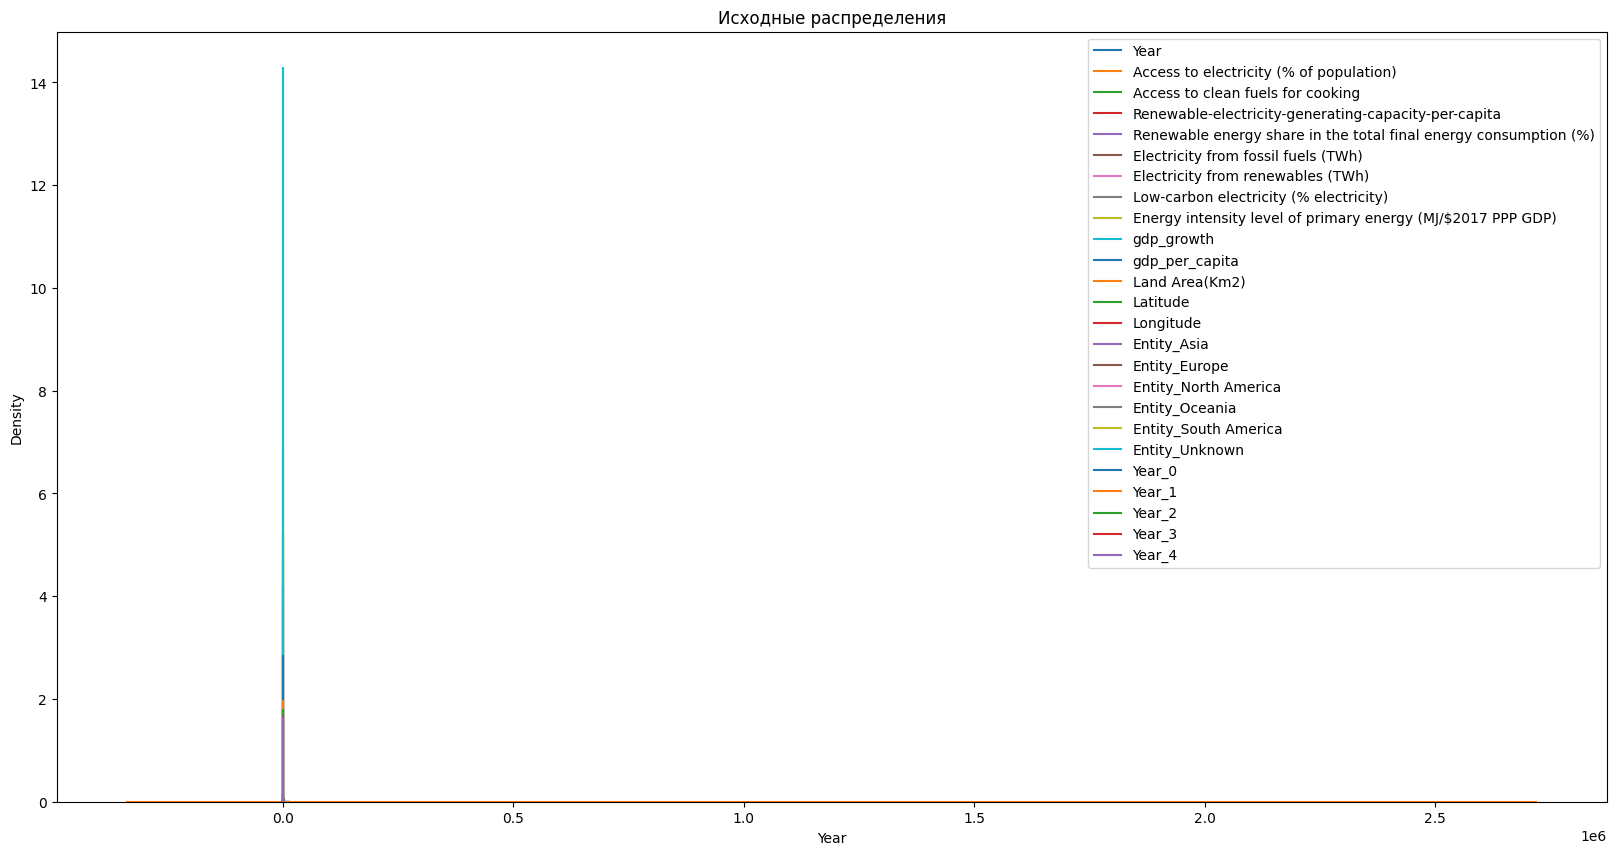

In [265]:
# Задаём параметры графика
fig, (ax) = plt.subplots(
    ncols = 1,
    figsize = (20, 10)
)

# Название графика
ax.set_title('Исходные распределения')



# Строим график
for column in X_train.columns:
    
    sns.kdeplot(
        data = X_train[column],
        ax = ax,
        label = column
    )
    
    
# Выводим график
plt.legend()

Произведём преобразование:

In [266]:
# Создаём объект MinMaxScaler()
mm_scaler = preprocessing.MinMaxScaler()

# Кодируем тренировочную и валидационную выборки
X_train = mm_scaler.fit_transform(X_train)
X_valid = mm_scaler.transform(X_valid)

# Вычислим среднее арифметическое для первого предиктора из набора.
# Ответ округлим до второго знака после точки разделителя
print('Арифметическое среднее первого предиктора из валидационной выборки: {}'.format(np.round(np.mean(X_valid[:, 0]), 2)))

# Создадим DataFrame из полученных массивов
X_train = pd.DataFrame(X_train, columns = important_features)
X_valid = pd.DataFrame(X_valid, columns = important_features)

Арифметическое среднее первого предиктора из валидационной выборки: 0.52


Выведем график после нормализации:

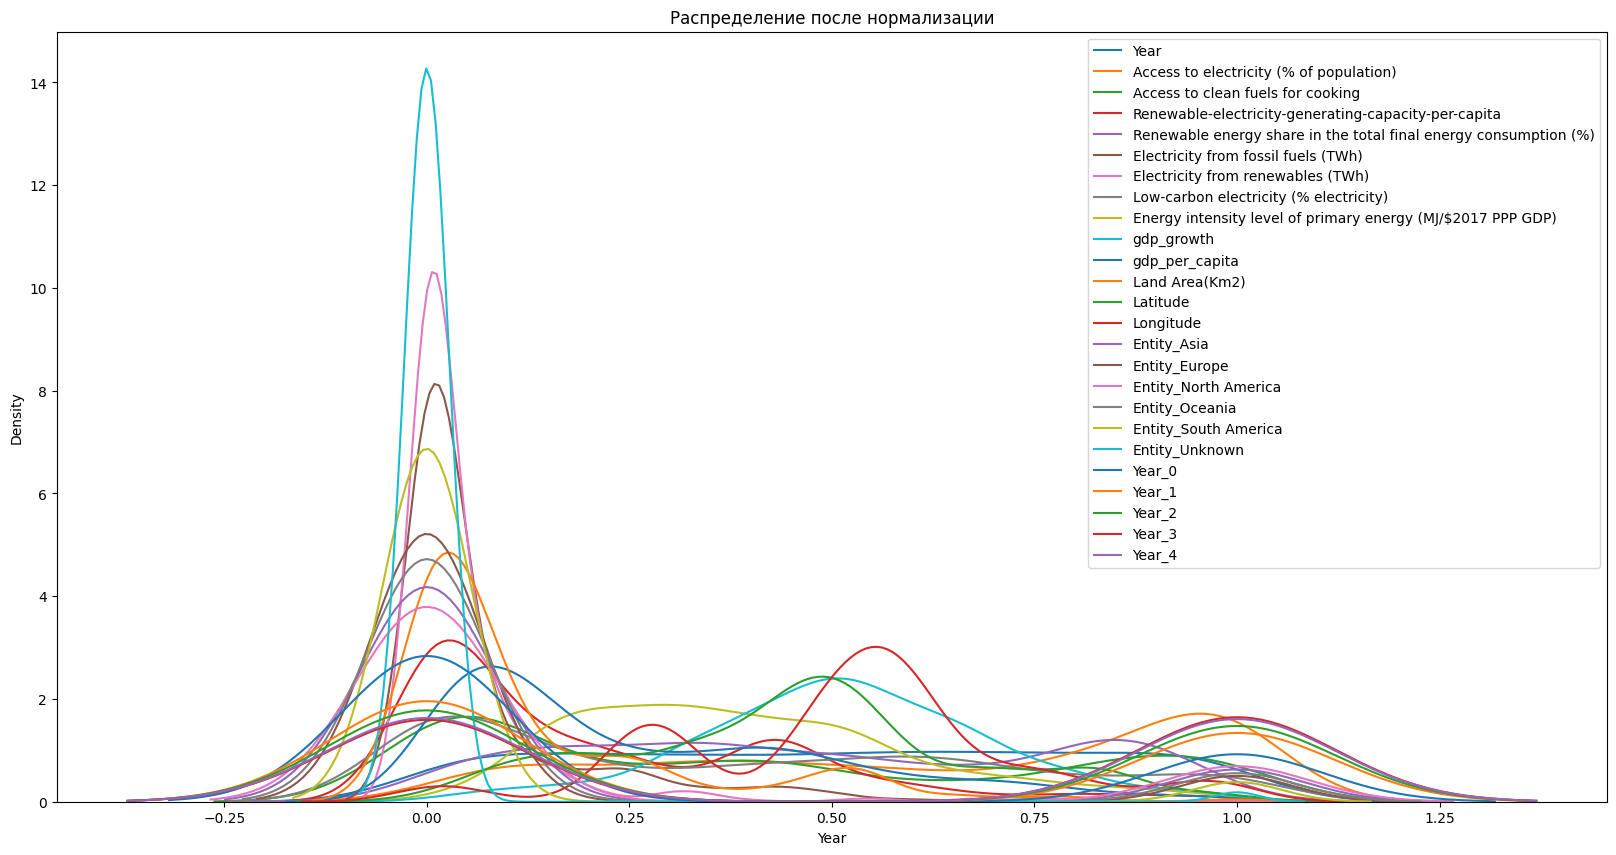

In [267]:
# Задаём параметры графика
fig, (ax) = plt.subplots(
    ncols = 1,
    figsize = (20, 10)
)

# Название графика
ax.set_title('Распределение после нормализации')



# Строим график
for column in X_train.columns:
    
    sns.kdeplot(
        data = X_train[column],
        ax = ax,
        label = column
    )
       
    
# Выводим график
plt.legend()

## <CENTER> **`6.` Machine Learning: Machine Learning: AutoML**

#### $6.1$

Разделим данные:

In [268]:
# Составляем список факторов (исключили целевой столбец)
features = sustainable_energy_df.drop('Primary energy consumption per capita (kWh/person)', axis = 1).columns

# Составляем матрицу наблюдений X, вектор правильных ответов y и логарифмированный вектор правильных ответов y_log
X = sustainable_energy_df[features]
y = sustainable_energy_df['Primary energy consumption per capita (kWh/person)']
y_log = sustainable_energy_df['Primary energy consumption per capita (kWh/person) log']

Определяем константы (количество потоков, таймаут, имя целевой колонки, размер валидационной выборки и так далее):

In [269]:
# Опредиляем константы для lightautoml
N_THREADS = 10
N_FOLDS = 10
RANDOM_STATE = 42
TEST_SIZE = 0.33
TIMEOUT = 600
TARGET_NAME = 'Primary energy consumption per capita (kWh/person) log'

Для максимальной воспроизводимости решения используем команды:

In [272]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

#### $6.2$

Разбиваем данные на тренировочную (**80%, train_data**) и валидационную (**20%, test_data**) выборки:

In [273]:
train_df, test_df = train_test_split(
    X,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE
)

In [274]:
# Выведем размеры тренировочной и тестовой части
print(f'Данные разделены. Размеры каждой части: train_data = {train_df.shape}, test_data = {test_df.shape}')

Данные разделены. Размеры каждой части: train_data = (923, 27), test_data = (456, 27)


Указываем задачу, которую решаем (задача регрессии **reg**) и указываем метрику (**mae**):

In [275]:
task = Task(
    'reg',
    loss = 'mae',
    metric = 'mae'
)

Указываем роли переменных:

In [276]:
roles = {
    'target': TARGET_NAME,
    'drop': []
}

#### $6.3$

С помощью класса **TabularAutoML** создаём модель **LightAutoML**:

In [277]:
automl = TabularAutoML(
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    
    reader_params = {
        'n_jobs': N_THREADS,
        'cv': N_FOLDS,
        'random_state': RANDOM_STATE
    }
    
)

#### $6.4$

Обучение тренировочной выборки:

In [278]:
oof_pred = automl.fit_predict(
    train_data = train_df,
    roles = roles,
    verbose = 1
)

[01:15:33] Stdout logging level is INFO.
[01:15:33] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[01:15:33] Task: reg

[01:15:33] Start automl preset with listed constraints:
[01:15:33] - time: 600.00 seconds
[01:15:33] - CPU: 10 cores
[01:15:33] - memory: 16 GB

[01:15:33] Train data shape: (923, 27)

[01:15:41] Layer 1 train process start. Time left 591.65 secs
[01:15:41] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[01:15:46] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.2280572488199444
[01:15:46] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[01:15:46] Time left 587.19 secs

[01:15:48] Selector_LightGBM fitting and predicting completed
[01:15:48] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[01:16:09] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.11129130656231657
[01:16:09] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[01:16:09] Start hyperparameters optimization for Lvl_0

In [279]:
# Выводим информацию об автоматической обработке
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.07145 * (10 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.52232 * (10 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.40622 * (10 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 


С помощью метода **fast** построим график, на котором отобразим оценку влияния каждого признака на полученные предсказания:

<Axes: xlabel='Feature'>

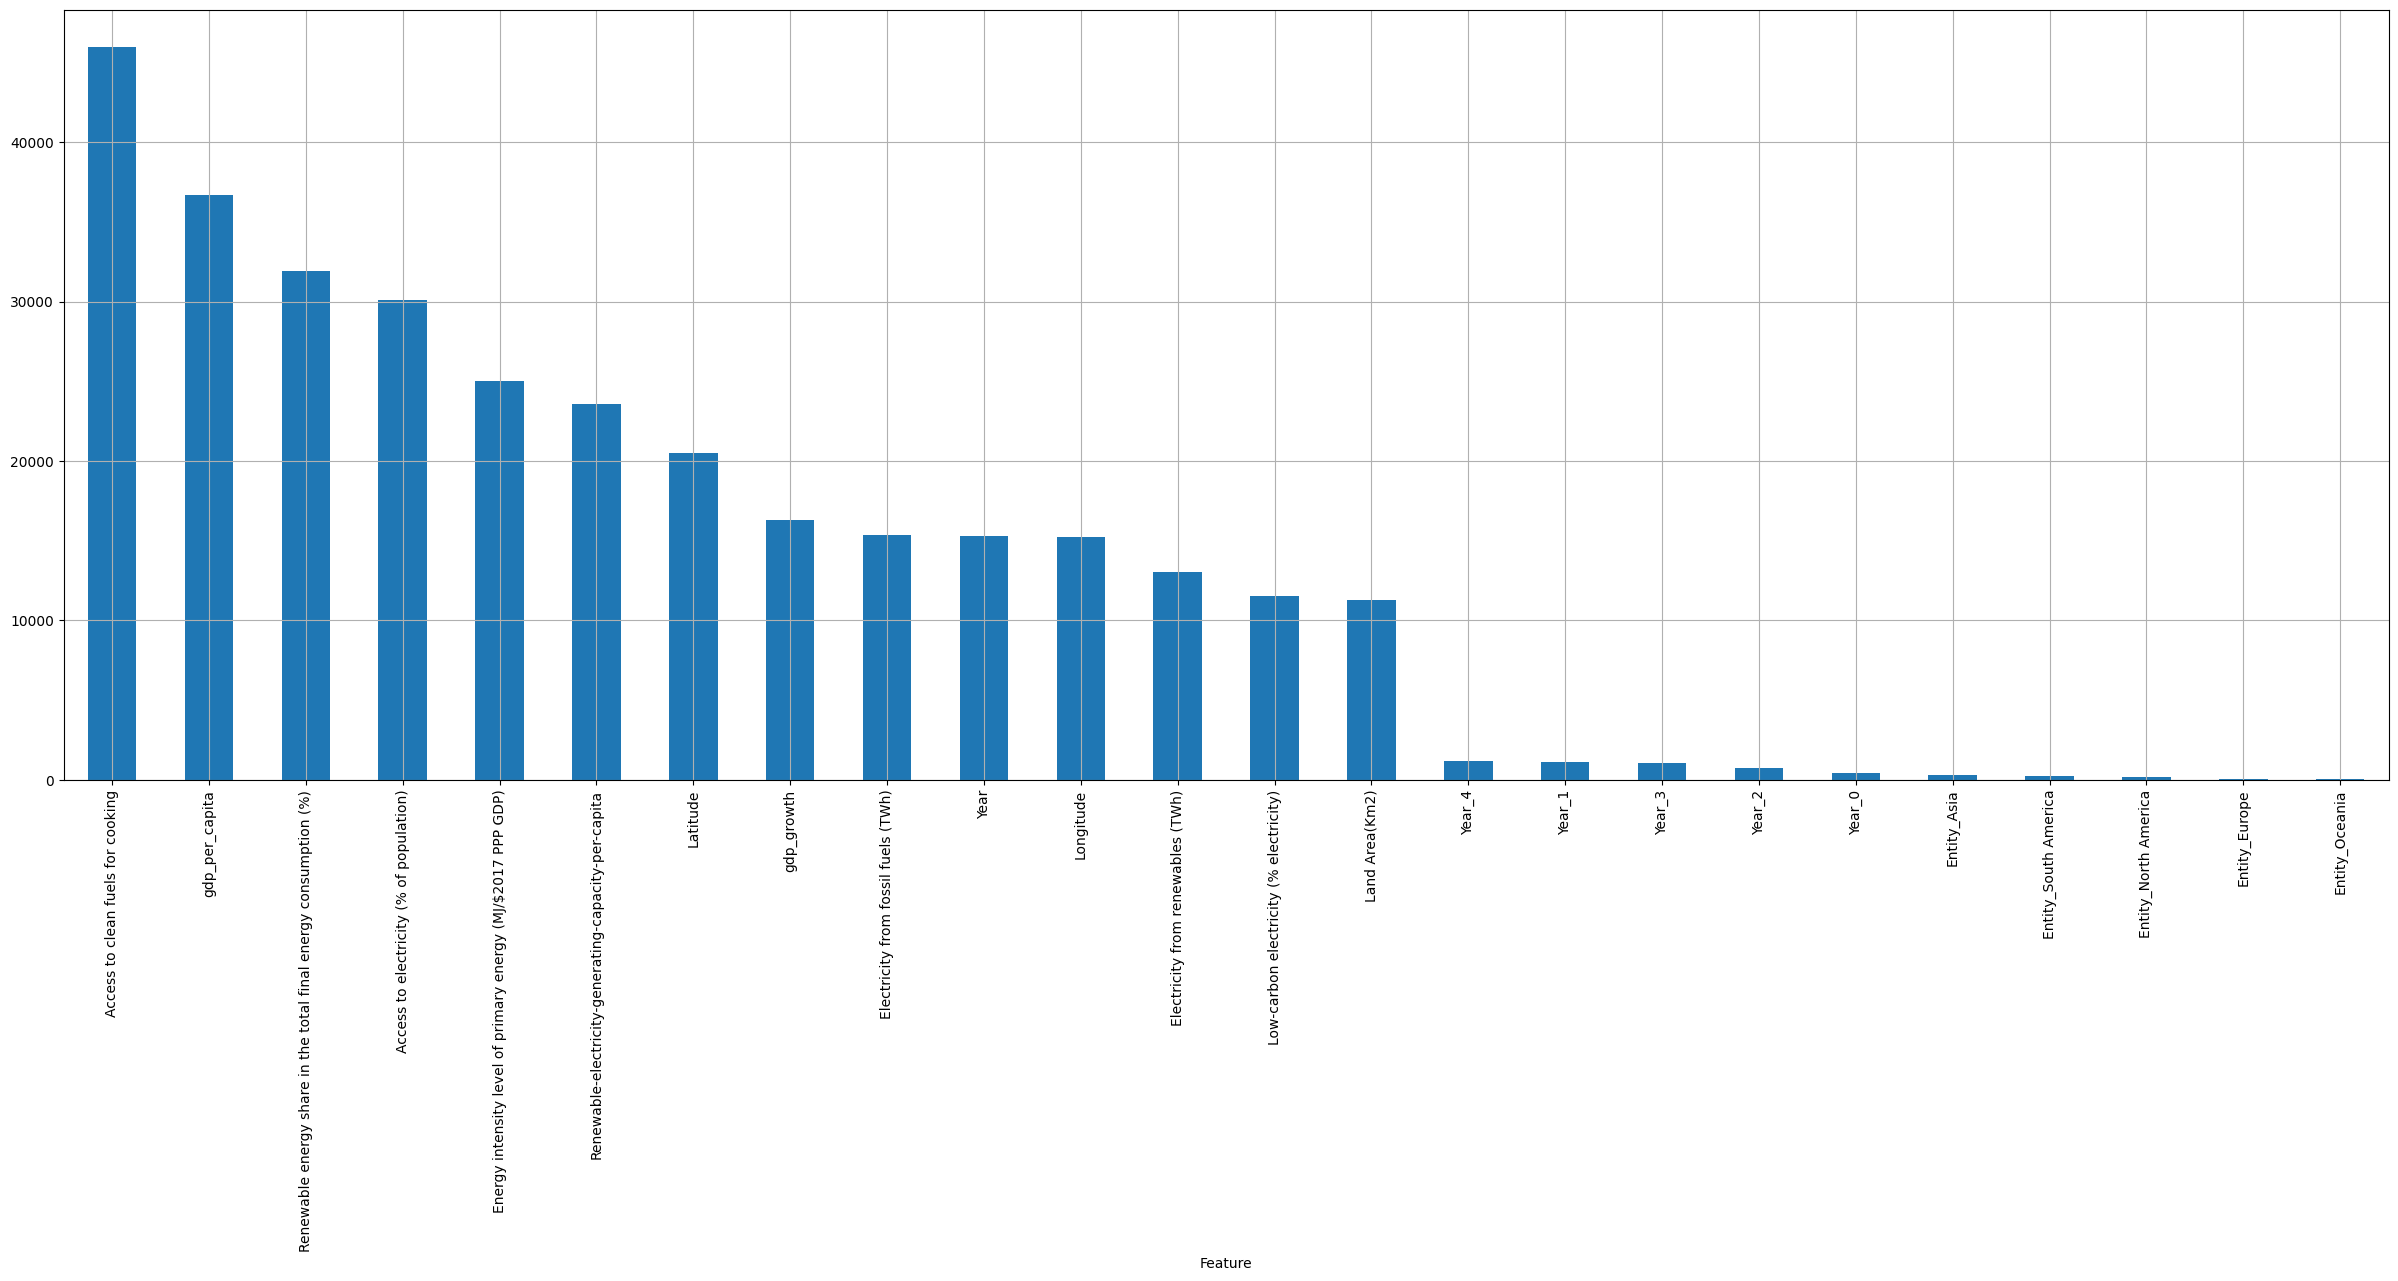

In [280]:
fast_fi = automl.get_feature_scores('fast')

# Строим график
fast_fi.set_index('Feature')['Importance'].plot.bar(
    figsize = (30, 10),
    grid = True
)

#### $6.5$

Обучение валидационной выборки:

In [281]:
test_pred = automl.predict(test_df)
print(f'Предсказание для test_df:\n{test_pred}\nShape = {test_pred.shape}')

Предсказание для test_df:
array([[ 6.982128 ],
       [ 9.780375 ],
       [ 9.393715 ],
       [ 8.555599 ],
       [ 9.913765 ],
       [ 8.06336  ],
       [ 9.753983 ],
       [ 7.8649426],
       [ 8.633981 ],
       [ 9.683964 ],
       [ 7.843839 ],
       [ 8.337431 ],
       [ 8.590697 ],
       [ 9.602871 ],
       [ 8.142866 ],
       [ 8.256878 ],
       [ 7.30871  ],
       [ 8.35582  ],
       [ 7.675494 ],
       [ 9.286421 ],
       [ 9.128443 ],
       [ 6.332972 ],
       [ 9.212441 ],
       [ 9.434066 ],
       [ 5.4744496],
       [ 9.163679 ],
       [ 8.059897 ],
       [ 9.65189  ],
       [ 8.354663 ],
       [ 7.4632373],
       [ 8.56789  ],
       [ 9.902778 ],
       [ 9.565388 ],
       [ 9.048485 ],
       [ 8.473673 ],
       [ 9.045109 ],
       [ 8.659509 ],
       [ 9.307613 ],
       [ 6.4906874],
       [ 9.065731 ],
       [ 9.582304 ],
       [ 7.854976 ],
       [ 9.641894 ],
       [ 8.229878 ],
       [ 7.3126717],
       [ 5.238283 ],
       [

In [282]:
# Сравниваем предсказанные значения (test_pred) с реальными (test_data), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.
print('MAPE: {:.4f}'.format(metrics.mean_absolute_percentage_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))

MAPE: 0.0095


## <CENTER> **`7.` Machine Learning: Linear Regression and Decision Trees**

#### $7.1$

Построим линейную регрессию на тренировочной выборке (используем целевую переменную в логарифмическом масштабе), при этом оставим все параметры без изменения.

Для полученной модели подсчитаем метрику *RMSLE* на тренировочной и валидационной выборке. Ответ **округлим до второго знака полсе точки разделителя**:

In [283]:
# Создаём объект класса LinearRegression()
lr_regression = LinearRegression()

# Обучаем модель
lr_regression.fit(X_train, y_train_log)

# Делаем предсказания на тренировочной и валидационной выборках
y_train_predict = lr_regression.predict(X_train)
y_valid_predict = lr_regression.predict(X_valid)

# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.40
RMSLE на валидационной выборке: 0.40

MAPE на тренировочной выборке: 0.04
MAPE на валидационной выборке: 0.04


#### $7.2$


Сгенерируем полиномиальные признаки второй степени, используя `PolynomialFeatures` из библиотеки *sklearn*. Возьмем `False` в качестве значения параметра `include_bias`.

Затем мы построим модель полиномиальной регрессии второй степени на обучающем наборе. Все параметры оставим по умолчанию.

Для полученной модели вычислим метрику *RMSLE* на обучающем и валидационном наборах. Ответ **округлим до второго знака после запятой**:

In [284]:
# Создаём генератор полиномиальных признаков PolynomialFeatures()
poly_features = preprocessing.PolynomialFeatures(
    degree = 2,
    include_bias = False
)

# Обучаем модель PolynomialFeatures()
poly_features.fit(X_train)



# Генерируем полиномиальные признаки на тренировочной и тестовой наборах данных
X_train_poly = poly_features.transform(X_train)
X_valid_poly = poly_features.transform(X_valid)



# Создаём объект класса LinearRegression()
lr_regression_poly = LinearRegression()

# Обучаем модель
lr_regression_poly.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = lr_regression_poly.predict(X_train_poly)
y_valid_predict = lr_regression_poly.predict(X_valid_poly)

# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.13
RMSLE на валидационной выборке: 5182779.15

MAPE на тренировочной выборке: 0.01
MAPE на валидационной выборке: 43949.11


#### $7.3$

Построим модель полиномиальной регрессии второй степени с $L_2$-регуляризацией (регуляризацией Тихонова) на обучающем наборе. Установим коэффициент регуляризации равным 1, остальные параметры оставим по умолчанию.

Для полученной модели мы вычисляем метрику *RMSLE* на обучающем и проверочном наборах. Ответ **округлим до второго знака после запятой**:

In [286]:
# Создаём объекта класса линейной регрессии с L2-регуляризацией
lr_regression_ridge = linear_model.Ridge(alpha = 1)

# Обучаем модель
lr_regression_ridge.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = lr_regression_ridge.predict(X_train_poly)
y_valid_predict = lr_regression_ridge.predict(X_valid_poly)

# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.20
RMSLE на валидационной выборке: 0.22

MAPE на тренировочной выборке: 0.02
MAPE на валидационной выборке: 0.02


### **Вывод:**


Среди задейсвованных моделей, наилучшего результата удалось получить с помощью модели `LinearRegression()`.

Метрики получились следующие:

*RMSLE* на тренировочной выборке: $0.40$

*RMSLE* на валидационной выборке: $0.40$

*MAPE* на тренировочной выборке: $0.04$

*MAPE* на валидационной выборке: $0.04$